In [41]:
%matplotlib inline
import importlib
import nn
importlib.reload(nn)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nn import NeuralNetwork

In [2]:
data_rings3_train = pd.read_csv("dane_nn4/rings3-regular-training.csv")
X_rings3_train = data_rings3_train[['x', 'y']].values.reshape(-1, 2)
y_rings3_train = data_rings3_train['c'].values.reshape(-1, 1)

data_rings3_test = pd.read_csv("dane_nn4/rings3-regular-test.csv")
X_rings3_test = data_rings3_test[['x', 'y']].values.reshape(-1, 2)
y_rings3_test = data_rings3_test['c'].values.reshape(-1, 1)

data_easy_train = pd.read_csv("dane_nn4/easy-training.csv")
X_easy_train = data_easy_train[['x', 'y']].values.reshape(-1, 2)
y_easy_train = data_easy_train['c'].values.reshape(-1, 1)
y_easy_train = y_easy_train.astype(int)

data_easy_test = pd.read_csv("dane_nn4/easy-test.csv")
X_easy_test = data_easy_test[['x', 'y']].values.reshape(-1, 2)
y_easy_test = data_easy_test['c'].values.reshape(-1, 1)
y_easy_test = y_easy_test.astype(int)

data_xor3_train = pd.read_csv("dane_nn4/xor3-training.csv")
X_xor3_train = data_xor3_train[['x', 'y']].values.reshape(-1, 2)
y_xor3_train = data_xor3_train['c'].values.reshape(-1, 1)
y_xor3_train = y_xor3_train.astype(int)

data_xor3_test = pd.read_csv("dane_nn4/xor3-test.csv")
X_xor3_test = data_xor3_test[['x', 'y']].values.reshape(-1, 2)
y_xor3_test = data_xor3_test['c'].values.reshape(-1, 1)
y_xor3_test = y_xor3_test.astype(int)

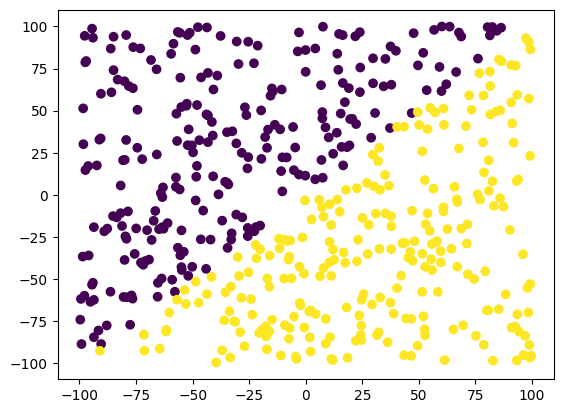

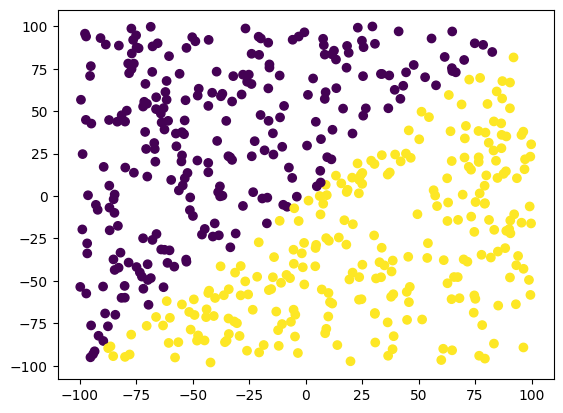

In [3]:
plt.scatter(X_easy_train[:, 0], X_easy_train[:, 1], c=y_easy_train.ravel(), cmap='viridis')
plt.show()

plt.scatter(X_easy_test[:, 0], X_easy_test[:, 1], c=y_easy_test.ravel(), cmap='viridis')
plt.show()

In [74]:
input_size = X_easy_train.shape[1]
output_size = np.unique(y_easy_train).shape[0]

nn_easy = NeuralNetwork(X_easy_train, y_easy_train, [input_size, 20, 20, output_size], activation_fun='sigmoid', output_activation='softmax', loss_fun='crossentropy')

history_easy = nn_easy.train(epochs=int(1e3), learning_rate=0.01, mini_batch=True, batch_size=100,
                             optimization='momentum', momentum=0.7, stop_condition=0, report_interval=10)

Starting loss: 1.07


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00] , Loss:  Current: 0.0043,Best: 0.0043


Training complete. Final loss: 0.0043


Accuracy: 1.0


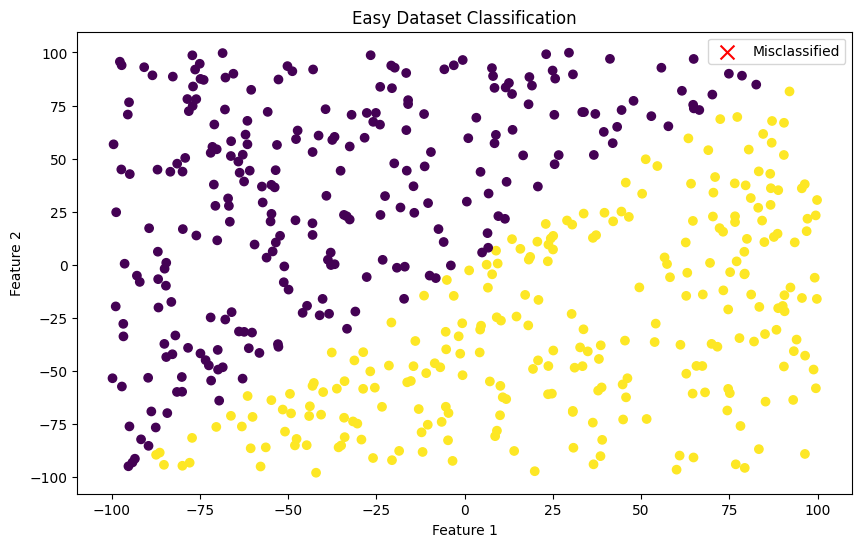

In [75]:
y_easy_pred = nn_easy.predict(X_easy_test)
y_easy_pred = np.argmax(y_easy_pred, axis=1).reshape(-1, 1)

## accuracy
accuracy = np.mean(y_easy_pred == y_easy_test)
print(f"Accuracy: {accuracy}")

# Find misclassified points
misclassified = y_easy_pred.ravel() != y_easy_test.ravel()

plt.figure(figsize=(10, 6))

# Plot correctly classified points
plt.scatter(X_easy_test[~misclassified, 0], X_easy_test[~misclassified, 1], 
            c=y_easy_test[~misclassified].ravel(), cmap='viridis')

# Plot misclassified points in red
plt.scatter(X_easy_test[misclassified, 0], X_easy_test[misclassified, 1], 
            color='red', marker='x', s=100, 
            label='Misclassified')

plt.title('Easy Dataset Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

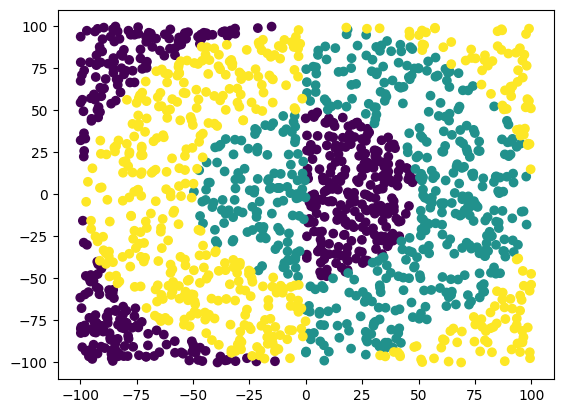

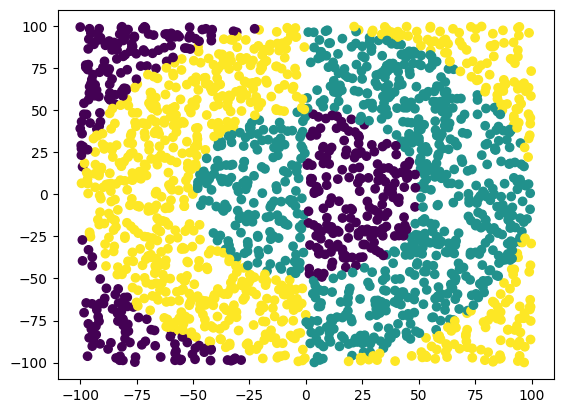

In [6]:
# plot the data

plt.scatter(X_rings3_train[:, 0], X_rings3_train[:, 1], c=y_rings3_train.ravel(), cmap='viridis')
plt.show()

plt.scatter(X_rings3_test[:, 0], X_rings3_test[:, 1], c=y_rings3_test.ravel(), cmap='viridis')
plt.show()


In [46]:
input_size = X_rings3_train.shape[1]
output_size = np.unique(y_rings3_train).shape[0]
nn_rings3 = NeuralNetwork(X_rings3_train, y_rings3_train, 
                   [input_size, 32, 32, output_size],
                   activation_fun='sigmoid', 
                   output_activation='softmax',   
                   loss_fun='crossentropy')

history_rings3 = nn_rings3.train(learning_rate=0.01, epochs=int(500), validation_data=(X_rings3_test, y_rings3_test), mini_batch=True, batch_size=100,
                        optimization='rmsprop', momentum=0, stop_condition=0.01, report_interval=10)
history_rings3 = nn_rings3.train(learning_rate=0.001, epochs=int(500), validation_data=(X_rings3_test, y_rings3_test), mini_batch=True, batch_size=100,
                        optimization='rmsprop', momentum=0, stop_condition=0.01, report_interval=10)

Starting loss: 1.15


Training: 100%|██████████████████████████████████████████████████████████████████████████| 500/500 [00:06<00:00] , Loss:  Current: 0.2291,Best: 0.1794



Training complete. Final loss: 0.1794
Starting loss: 0.20


Training: 100%|██████████████████████████████████████████████████████████████████████████| 500/500 [00:07<00:00] , Loss:  Current: 0.1327,Best: 0.1288


Training complete. Final loss: 0.1288


Accuracy: 0.9675


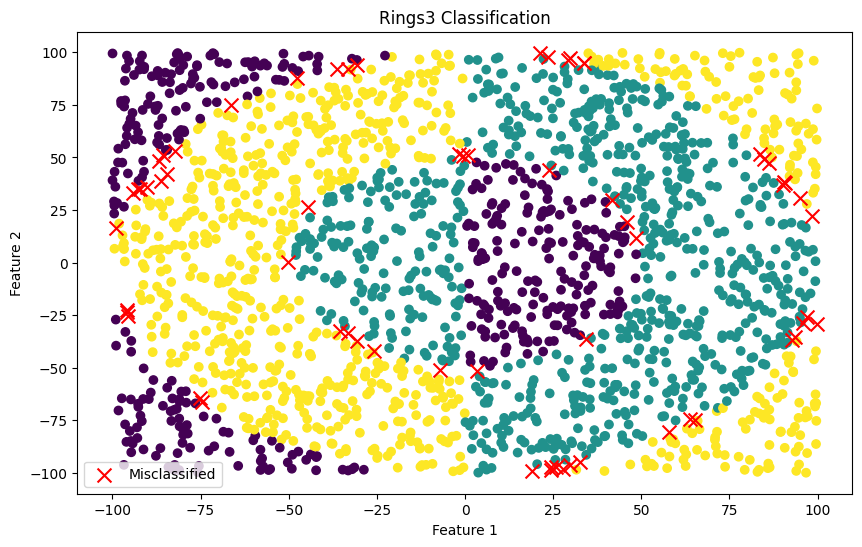

In [64]:
y_pred = nn_rings3.predict(X_rings3_test)
y_pred = np.argmax(y_pred, axis=1)
accuracy = np.mean(y_pred == y_rings3_test.ravel())
print(f'Accuracy: {accuracy}')

# Find misclassified points
misclassified = y_pred != y_rings3_test.ravel()

plt.figure(figsize=(10, 6))

# Plot correctly classified points
plt.scatter(X_rings3_test[~misclassified, 0], X_rings3_test[~misclassified, 1], 
            c=y_rings3_test[~misclassified].ravel(), cmap='viridis')

# Plot misclassified points in red
plt.scatter(X_rings3_test[misclassified, 0], X_rings3_test[misclassified, 1], 
            color='red', marker='x', s=100, 
            label='Misclassified')

plt.title('Rings3 Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

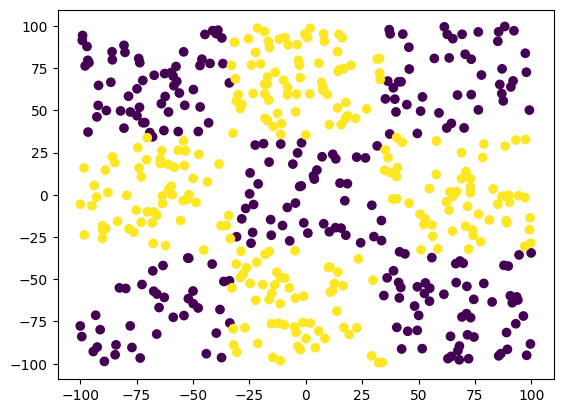

In [24]:
plt.scatter(X_xor3_train[:, 0], X_xor3_train[:, 1], c=y_xor3_train.ravel(), cmap='viridis')
plt.show()

In [54]:
input_size = X_xor3_train.shape[1]
output_size = np.unique(y_xor3_train).shape[0]

nn_xor3 = NeuralNetwork(X_xor3_train, y_xor3_train, [input_size, 20, 20, output_size],
                         activation_fun='sigmoid', output_activation='softmax', loss_fun='crossentropy')

history_xor3 = nn_xor3.train(learning_rate=0.01, epochs=int(3e3), validation_data=(X_xor3_test, y_xor3_test), mini_batch=True, batch_size=8,
                        optimization='rmsprop', momentum=0.7, stop_condition=0.01, report_interval=10)
history_xor3 = nn_xor3.train(learning_rate=0.001, epochs=int(3e3), validation_data=(X_xor3_test, y_xor3_test), mini_batch=True, batch_size=8,
                        optimization='rmsprop', momentum=0.7, stop_condition=0.01, report_interval=10)

Starting loss: 0.73


Training: 100%|████████████████████████████████████████████████████████████████████████| 3000/3000 [01:23<00:00] , Loss:  Current: 0.3658,Best: 0.1289



Training complete. Final loss: 0.1289
Starting loss: 0.16


Training: 100%|████████████████████████████████████████████████████████████████████████| 3000/3000 [00:46<00:00] , Loss:  Current: 0.4619,Best: 0.1289


Training complete. Final loss: 0.1289


Accuracy: 0.964


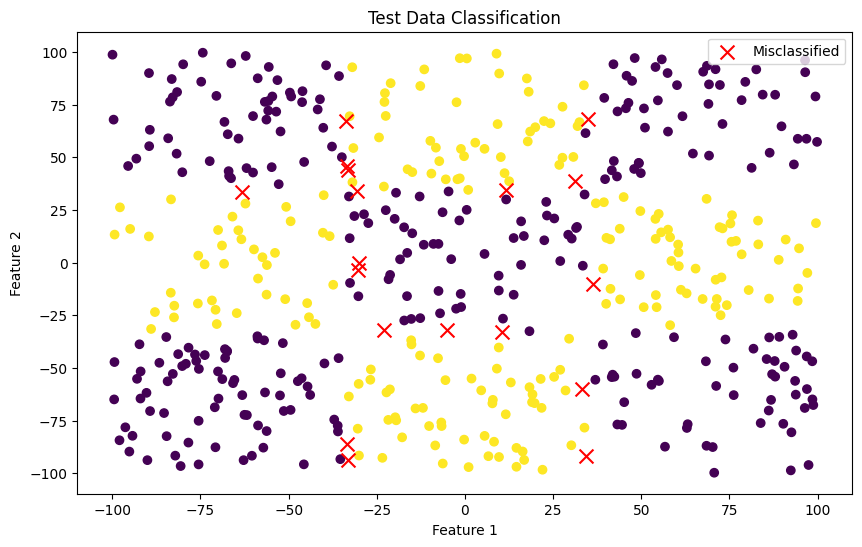

In [65]:
y_xor3_pred = nn_xor3.predict(X_xor3_test) 
y_xor3_pred = np.argmax(y_xor3_pred, axis=1).reshape(-1, 1)

# Accuracy calculation
accuracy = np.mean(y_xor3_pred == y_xor3_test)
print(f"Accuracy: {accuracy}")

misclassified = y_xor3_pred.ravel() != y_xor3_test.ravel()

plt.figure(figsize=(10, 6))

plt.scatter(X_xor3_test[~misclassified, 0], X_xor3_test[~misclassified, 1], 
            c=y_xor3_test[~misclassified].ravel(), cmap='viridis')
plt.scatter(X_xor3_test[misclassified, 0], X_xor3_test[misclassified, 1], 
            color='red', marker='x', s=100, 
            label='Misclassified')

plt.title('Test Data Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()